In [ ]:
#Dataset link= https://www.kaggle.com/code/renjiabarai/cell-phone-prediction

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']= (12, 8)
rainbow=sns.color_palette("hls",7)

In [76]:
df_train= pd.read_csv("CellPhone_train.csv")

In [77]:
df_test=pd.read_csv('CellPhone_test.csv')

In [78]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [79]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [80]:
df_train['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

<Axes: >

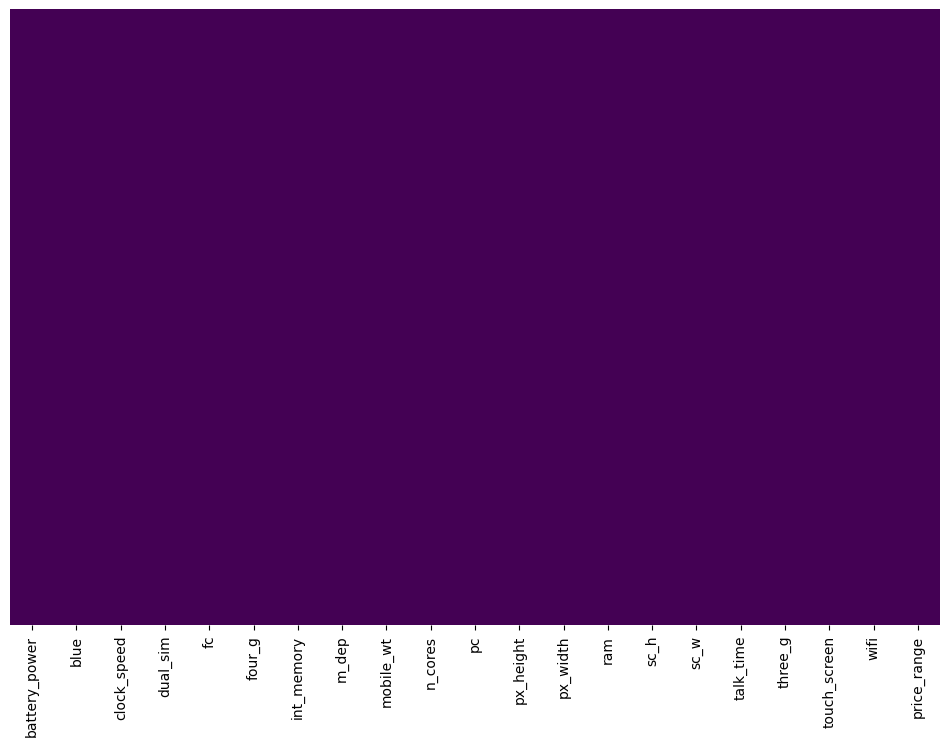

In [81]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [84]:
X = df_train.drop(["price_range"], axis=1)
y = df_train["price_range"]

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [87]:
mymodels = {
    "Logistic Regression" : LogisticRegression(),
    "rfc100": RandomForestClassifier(n_estimators=100),
    "rfc50": RandomForestClassifier(n_estimators=50),
    "NBayes": GaussianNB(),
    "KNC": KNeighborsClassifier(),
    "SVC" : SVC(),
}

In [88]:
for algo_name, algo in mymodels.items():
    print('Algorithm in consideration = ' + algo_name)
    algo.fit(X_train, y_train)

Algorithm in consideration = Logistic Regression
Algorithm in consideration = rfc100


C:\Users\YB628LA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Algorithm in consideration = rfc50
Algorithm in consideration = NBayes
Algorithm in consideration = KNC
Algorithm in consideration = SVC


In [99]:
from sklearn.metrics import classification_report,confusion_matrix
def cr(y_pred,y_test):
    print(classification_report(y_test,y_pred))


In [90]:
cr(mymodels['Logistic Regression'].predict(X_test),y_test)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        94
           1       0.54      0.58      0.56       102
           2       0.52      0.36      0.43       120
           3       0.58      0.81      0.68        84

    accuracy                           0.61       400
   macro avg       0.61      0.63      0.61       400
weighted avg       0.61      0.61      0.60       400



In [91]:
cr(mymodels['rfc100'].predict(X_test),y_test)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        94
           1       0.81      0.86      0.84       102
           2       0.91      0.82      0.86       120
           3       0.91      0.94      0.92        84

    accuracy                           0.88       400
   macro avg       0.88      0.89      0.89       400
weighted avg       0.88      0.88      0.88       400



In [92]:
cr(mymodels['rfc50'].predict(X_test),y_test)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        94
           1       0.77      0.84      0.81       102
           2       0.89      0.78      0.83       120
           3       0.89      0.93      0.91        84

    accuracy                           0.86       400
   macro avg       0.86      0.87      0.86       400
weighted avg       0.86      0.86      0.86       400



In [93]:
cr(mymodels['NBayes'].predict(X_test),y_test)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        94
           1       0.69      0.73      0.71       102
           2       0.76      0.74      0.75       120
           3       0.87      0.89      0.88        84

    accuracy                           0.80       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.80      0.80      0.80       400



In [94]:
cr(mymodels['KNC'].predict(X_test),y_test)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        94
           1       0.89      0.92      0.90       102
           2       0.93      0.92      0.92       120
           3       0.98      0.96      0.97        84

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [95]:
cr(mymodels['SVC'].predict(X_test),y_test)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        94
           1       0.90      0.95      0.92       102
           2       0.97      0.90      0.94       120
           3       0.97      0.99      0.98        84

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



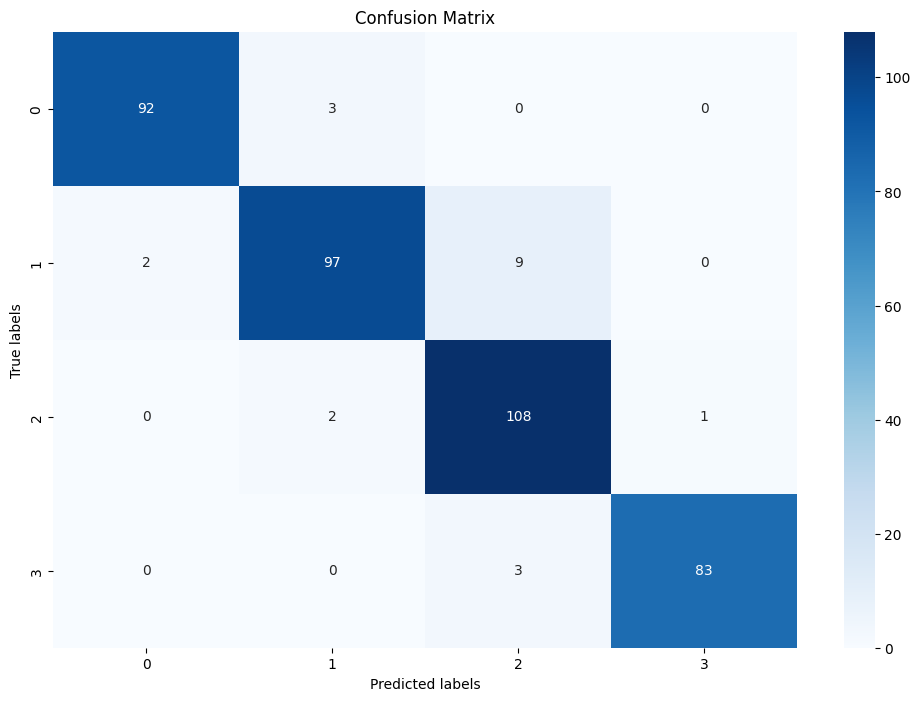

In [102]:

conf_matrix = confusion_matrix(mymodels['SVC'].predict(X_test),y_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

As we can see the best accuracy is for Support Vector machine. So we'll use the same aldo to populate The test data set

In [105]:
price_range_predicted = mymodels['SVC'].predict(df_test.drop(['id'], axis=1))

In [107]:
df_test['predicted_price_range'] = price_range_predicted

In [110]:
df_test.to_csv("predicted_predict_range.csv",  encoding='utf-8')